# Production of Animal Products in Mainland China
# 中国大陆动物产品的生产情况

## Ready to work  准备

### Import Libraries 导入工具库

In [3]:
# import necessary libs

import os
import time
import datetime
import json
from zipfile import ZipFile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms

from bs4 import BeautifulSoup

import folium
from folium import plugins
from matplotlib_venn import venn2, venn3, venn3_circles

%matplotlib inline

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('max_colwidth',100)

In [4]:
# what is the relevent path of root
root_where = '../../'
print('+++++++++ Atention ++++++++++')
print(f'The root is set as "{root_where}" relevent to this file.' )
print(f'If it is not right, you change this parameter where the parameter name is "root_where".' )
print('+++++++++++++++++++++++++++++')
print('')

LOCAL_ROOT = os.path.abspath(root_where)

DATA_BASE = os.path.join(LOCAL_ROOT, 'data')
DATA_FAO = os.path.join(DATA_BASE, 'FAO')
DATA_NBS = os.path.join(DATA_BASE, 'NBS')
DATA_hybrids = os.path.join(DATA_BASE, 'hybrids')

NBS_meta = os.path.join(DATA_NBS, 'metadata')

FAO_meta = os.path.join(DATA_FAO, 'metadata')
FAO_description_path = FAO_meta + '/datasets_E.xml'
FAO_BULK_zip = DATA_FAO + '/FAOSTAT.zip'

print(f'Root director: {LOCAL_ROOT}')
print(f'Data director: {DATA_BASE}')
print(f'FAO data director: {DATA_FAO}')
print(f'NBS data director: {DATA_NBS}')
print(f'Datasets hybrids director: {DATA_hybrids}')
print('')
print(f'NBS metadata director: {NBS_meta}')
print('')
print(f'FAO metadata director: {FAO_meta}')
print(f'FAO local description file: {FAO_description_path}')
print(f'FAO local datasets zip: {FAO_BULK_zip}')
print('')

SUFFIX = '_E_All_Data_(Normalized)'  # suffix of fao data file name
print(f'Suffix of raw FAO data file name: {SUFFIX}')

+++++++++ Atention ++++++++++
The root is set as "../../" relevent to this file.
If it is not right, you change this parameter where the parameter name is "root_where".
+++++++++++++++++++++++++++++

Root director: /mnt/sda2/_hub/projects/GoodFood/meat-atlas
Data director: /mnt/sda2/_hub/projects/GoodFood/meat-atlas/data
FAO data director: /mnt/sda2/_hub/projects/GoodFood/meat-atlas/data/FAO
NBS data director: /mnt/sda2/_hub/projects/GoodFood/meat-atlas/data/NBS
Datasets hybrids director: /mnt/sda2/_hub/projects/GoodFood/meat-atlas/data/hybrids

NBS metadata director: /mnt/sda2/_hub/projects/GoodFood/meat-atlas/data/NBS/metadata

FAO metadata director: /mnt/sda2/_hub/projects/GoodFood/meat-atlas/data/FAO/metadata
FAO local description file: /mnt/sda2/_hub/projects/GoodFood/meat-atlas/data/FAO/metadata/datasets_E.xml
FAO local datasets zip: /mnt/sda2/_hub/projects/GoodFood/meat-atlas/data/FAO/FAOSTAT.zip

Suffix of raw FAO data file name: _E_All_Data_(Normalized)


In [5]:
""" Path of images is under building """
# path_img = './results/CN_AnimalProduction/img/'
# path_map = './results/CN_AnimalProduction/img/'
# for path in [path_img, path_map]:
#     for i in os.listdir(path):
#         path_file = os.path.join(path,i)  
#         if os.path.isfile(path_file):
#               os.remove(path_file)

' Path of images is under building '

### Read Data Frame 读取数据

- 'MeatProduction_clean.csv' is the data needed in this program. See how the data was obtained and cleaned: [CN_AnimalProduction_DataCleaning](CN_AnimalProduction_DataCleaning);

- 'AnimalProduction_clean_doc.csv' explains the data's feilds;

- 'GeoNameSheet_cn.csv' lists all the mainland China's areas;

In [6]:
data = pd.read_csv(DATA_hybrids+'/AnimalProduction_clean.csv')
doc = pd.read_csv(DATA_hybrids+'/AnimalProduction_doc.csv')
geoname = pd.read_csv(NBS_meta+'/GeoNameSheet_cn.csv')
display(doc)
display(data.head())
display(geoname.head())
# display(data.head())
# display(geoname.head())

,Item-En,项目名称: Item_Cn,Explanation-En,中文解释: Explanation-Cn,Unit-En,单位: Unit-Cn,Remarek-En,备注: Remark-Cn
0,Area,地区,"Name of countries, areas or China's provinces (or provincial level areas of China)",国家、地区或中国省份（或中国省级地区）的名字；,10000 heads,万头,NaN,NaN
1,Year,年份,Years.,年份,10000 heads,万头,NaN,NaN
2,"Stock, cattle",存栏量_牛,Numbers of stocks of cattle.,牛的存栏量,10000 heads,万头,NaN,NaN
3,"Stock, goat & sheep",存栏量_山羊&绵羊,Numbers of stocks of the total of goats and sheep.,山羊和绵羊的总存栏量,10000 heads,万头,NaN,NaN
4,"Stock, pig",存栏量_猪,Numbers of stocks of pigs.,猪的存栏量,10000 heads,万头,NaN,NaN
5,"Stock, birds",存栏量_禽类,Numbers of stocks of birds.,禽类的存栏量,10000 heads,万头,"Areas data estimated by (each year's 'Slaughtered, birds' of cn / each year's 'Stock, birds' of...",地方数据根据 (每年全国'屠宰量_禽类' / 每年全国'存栏量_禽类' = 同年各地'屠宰量_禽类' /同年各地'存栏量_禽类') 估算
6,"Slaughtered, cattle",屠宰量_牛,Numbers of slaughtered cattle for meat.,牛的屠宰数量（出栏量）,10000 heads,万头,NaN,NaN
7,"Slaughtered, goat & sheep",屠宰量_山羊&绵羊,Numbers of slaughtered goats and sheep for meat.,山羊和绵羊的屠宰数量（出栏量）,10000 heads,万头,NaN,NaN
8,"Slaughtered, pig",屠宰量_猪,Numbers of slaughtered pigs for meat.,猪的屠宰数量（出栏量）,10000 heads,万头,NaN,NaN
9,"Slaughtered, birds",屠宰量_禽类,"Numbers of slaughtered birds for meat, mainly from chicken and duck.",禽类的屠宰数量（出栏量）,10000 heads,万头,NaN,NaN


,Area,Year,"Stock, cattle","Stock, goat & sheep","Stock, pig","Stock, birds","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, pig","Slaughtered, birds","Meat Production, cattle","Meat Production, goat & sheep","Meat Production, pig","Meat Production, birds","Egg Production, birds","Milk Production, cow","Meat Yield, cattle","Meat Yield, goat & sheep","Meat Yield, pig","Meat Yield, birds","Aquatic, total","Aquatic, animals","Marine, total","Marine, capture","Marine, aquac.",Marine Fish,Marine Crustaceans,Marine Molluscs,Marine Plants,"Marine, others","Freshwater, total","Freshwater, capture","Freshwater, aquac.",Freshwater Fish,Freshwater Crustaceans,Freshwater Molluscs,"Freshwater, others"
0,"China, mainland",1961,4940.0,11281.0,8227.0,62600.0,50.6,1000.0,3300.0,54500.0,4.3,10.0,137.0,57.00,150.0,60.0,85.0,10.000000,41.5,1.045872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"China, mainland",1962,4676.0,12387.0,7552.0,64200.0,69.0,1000.0,4300.0,56400.0,6.2,10.0,178.0,59.00,152.0,62.0,89.9,10.000000,41.4,1.046099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"China, mainland",1963,4736.0,13465.0,9997.0,66300.0,92.5,1200.0,7800.0,58000.0,8.3,12.0,330.0,60.75,154.0,63.5,89.7,10.000000,42.3,1.047414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"China, mainland",1964,4894.0,13747.0,13180.0,68400.0,103.5,1400.0,10500.0,59400.0,9.3,14.0,450.0,62.25,158.0,64.0,89.9,10.000000,42.9,1.047980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"China, mainland",1965,5242.0,13669.0,15247.0,69000.0,116.0,1570.0,12167.0,61600.0,10.4,16.0,525.0,64.50,162.0,64.5,89.7,10.191083,43.1,1.047078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Area Code,Area,Region
0,41,"China, mainland",East Asia
1,1001,Beijing,North China
2,1002,Tianjin,North China
3,1003,Hebei,North China
4,1004,Shanxi,North China


In [7]:
df = pd.merge(geoname, data, on='Area', how='outer')

print('The shape and the head of the data frame:')
print(df.shape)
display(df.head())

The shape and the head of the data frame:
(677, 39)


,Area Code,Area,Region,Year,"Stock, cattle","Stock, goat & sheep","Stock, pig","Stock, birds","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, pig","Slaughtered, birds","Meat Production, cattle","Meat Production, goat & sheep","Meat Production, pig","Meat Production, birds","Egg Production, birds","Milk Production, cow","Meat Yield, cattle","Meat Yield, goat & sheep","Meat Yield, pig","Meat Yield, birds","Aquatic, total","Aquatic, animals","Marine, total","Marine, capture","Marine, aquac.",Marine Fish,Marine Crustaceans,Marine Molluscs,Marine Plants,"Marine, others","Freshwater, total","Freshwater, capture","Freshwater, aquac.",Freshwater Fish,Freshwater Crustaceans,Freshwater Molluscs,"Freshwater, others"
0,41,"China, mainland",East Asia,1961,4940.0,11281.0,8227.0,62600.0,50.6,1000.0,3300.0,54500.0,4.3,10.0,137.0,57.00,150.0,60.0,85.0,10.000000,41.5,1.045872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41,"China, mainland",East Asia,1962,4676.0,12387.0,7552.0,64200.0,69.0,1000.0,4300.0,56400.0,6.2,10.0,178.0,59.00,152.0,62.0,89.9,10.000000,41.4,1.046099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,41,"China, mainland",East Asia,1963,4736.0,13465.0,9997.0,66300.0,92.5,1200.0,7800.0,58000.0,8.3,12.0,330.0,60.75,154.0,63.5,89.7,10.000000,42.3,1.047414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41,"China, mainland",East Asia,1964,4894.0,13747.0,13180.0,68400.0,103.5,1400.0,10500.0,59400.0,9.3,14.0,450.0,62.25,158.0,64.0,89.9,10.000000,42.9,1.047980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,41,"China, mainland",East Asia,1965,5242.0,13669.0,15247.0,69000.0,116.0,1570.0,12167.0,61600.0,10.4,16.0,525.0,64.50,162.0,64.5,89.7,10.191083,43.1,1.047078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Show the latest year of data and store the value to 'DATA_YEAR'

In [8]:
"""
the domain of the table called 'Animal Production'
the items include:
    'Meat Production, pig', 'Meat Production, cattle', 'Meat Production, goat & sheep',
    'Meat Production, birds', 'Aquatic, animals', 
    'Egg Production, birds', 'Milk Production, cow'
the latest year of data will be stored in variable 'DATA_YEAR'
"""

D = 'Animal Production'             # Domain, will appear as names of Y_labels, legends, titles and so on.
Is = [
    'Meat Production, pig', 'Meat Production, cattle', 'Meat Production, goat & sheep',
    'Meat Production, birds', 'Aquatic, animals', 
    'Egg Production, birds','Milk Production, cow'
]                                   # Items, data in these columns will be visualized

DATA = df[['Area Code', 'Area', 'Year']+Is]
DATA = DATA.dropna().drop_duplicates()

Years = DATA['Year'].unique()               
print ('The datasets years cover: ', Years)

The datasets years cover:  [1978 1980 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017]


### Plot style settings 设置输出风格

In [9]:
# plt.style.use(['ggplot'])

# fig size
FIG_size = (6, 3)
DPI = 300

# font size
TIT_size = 12    # titles
LAB_size = 10    # labels
LEG_size = 10    # legends
TCK_size = 10    # ticklabels

LIN_wei = 1.5    # line weights
BAR_wid = 3      # bar width

# GRD_wid = 0.5    # grid line width
# GRD_clr = 'white' 
# GRD_aph = 1     # grid alpha

# 猪，牛，羊，禽肉，鱼，蛋，奶
CLs = ('#ffab91','#c62828','#689f38','#ff6f00','#80deea','#ffc400','#1e88e5',)
MKs = ('o', 'x','o','x', 'v','.','v','.','o','x','o', 'x', 'v','.','v','.')
LSs = ('-','-','--', ':', ':','-.','-.','-','-','--','--', ':', ':','-.','-.')

# =============================================================================================================
def setX_quant(ax, ticks, step, label = ''):
    ax.set_xticks(ticks)
    ax.set_xlim(ticks[0]-step/2,ticks[-1]+step/2)
    ax.set_xticklabels(ticks, rotation=0, ha='center', fontsize=TCK_size)
    ax.set_xlabel(label, fontsize=LAB_size)
#     ax.xaxis.grid(True, linewidth=GRD_wid, color=GRD_clr, alpha=GRD_aph)
    
def setX_quali(ax, ticks, label = ''):
    ax.set_xticklabels(ticks, rotation=90, ha='center', fontsize=TCK_size)
    ax.set_xlabel(label, fontsize=LAB_size)
#     ax.xaxis.grid(True, linewidth=GRD_wid, color=GRD_clr, alpha=GRD_aph)

def setY_quant(ax, y_max, label = ''):
    tick_num = 9
    step = y_max/(tick_num-1)
    min_gap = 10
    
    if step < 1:
        step = round(step,1)
        dec=1
    elif step < 10:
        step = int(step)
        dec=0
    elif step/min_gap < 10:
        step = int(step/min_gap)*10
        dec=0
    else:
        n=0
        while step/min_gap >= 10:
            step = int(step/min_gap)
            n += 1
        step = int(step/min_gap)*(min_gap**(n+1))
        dec=0
        
    y_max = step*(tick_num+1)        
    ticks = np.round(np.arange(0, y_max+step, step),decimals=dec)
    ax.set_yticks(ticks)
    ax.set_ylim(ticks[0],ticks[-1]+step)
    ax.set_yticklabels(ticks, fontsize=TCK_size)
    ax.set_ylabel(label, fontsize=LAB_size) 
#     ax.yaxis.grid(True, linewidth=GRD_wid, color=GRD_clr, alpha=GRD_aph)
    
def setY_per(ax):
    ticks=np.round(np.linspace(0, 100, num=11, endpoint=True), decimals=0)
    ax.set_yticks(ticks)
    ax.set_ylim(ticks[0],ticks[-1])
    ax.set_yticklabels(ticks, fontsize=TCK_size)
    ax.set_ylabel('Percentage (%)', fontsize=LAB_size)
#     ax.yaxis.grid(True, linewidth=GRD_wid, color=GRD_clr, alpha=GRD_aph)

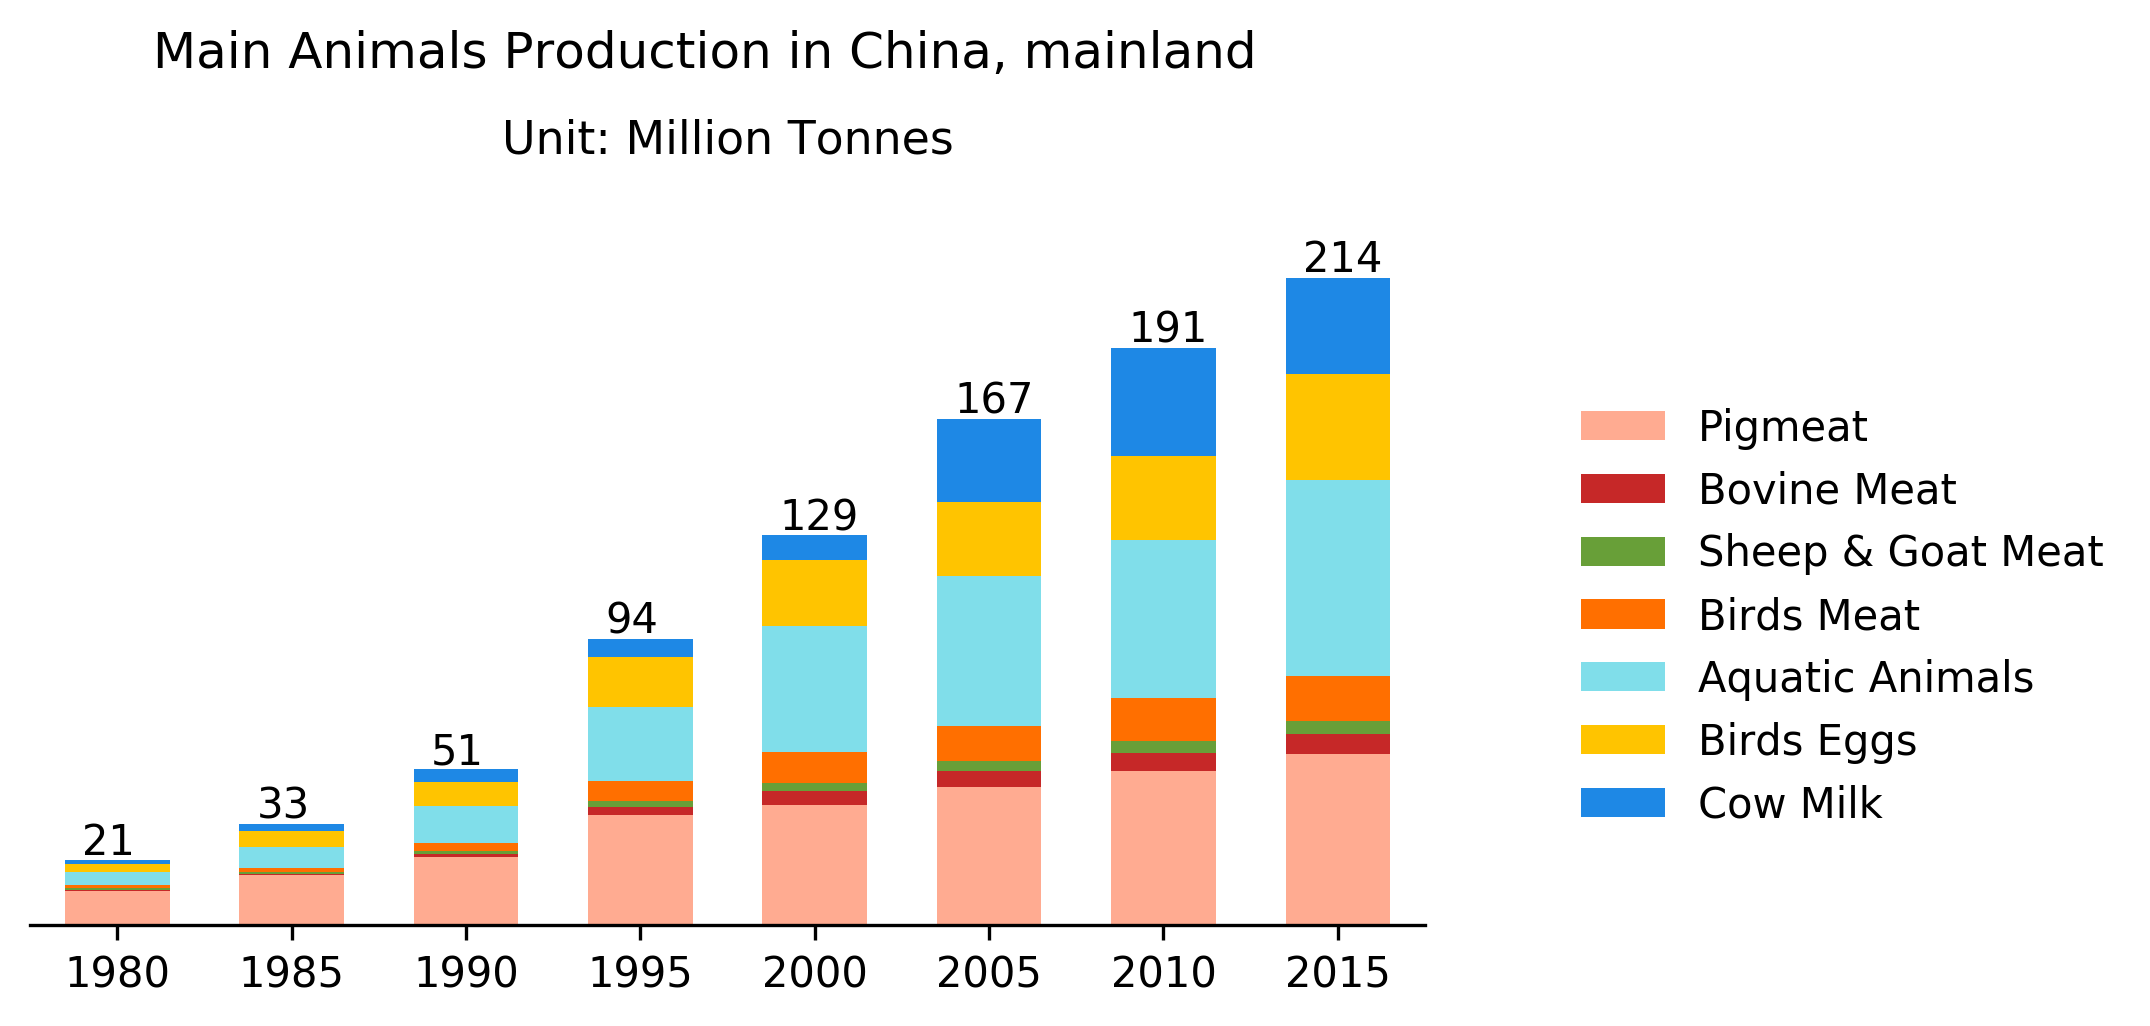

In [10]:
raw_df=DATA
area='China, mainland'
unit='Million Tonnes'
domain=D
items=Is

df=raw_df.copy()

title = "Main Animals Production in China, mainland"
dfs = {}
for n in range(len(items)):
    dfs[items[n]] = df[df['Area']==area][['Year',items[n]]]
    if unit == '': 
        sub_title = "Unit: 10,000 Tonnes"
    elif unit=='Million Tonnes':
        dfs[items[n]][items[n]] = dfs[items[n]][items[n]]/100
        sub_title = f"Unit: {unit}"

fig = plt.figure(figsize=FIG_size, dpi=DPI)
plt.suptitle(title, fontsize=TIT_size, y=1.12)
plt.title(sub_title, fontsize=TIT_size-1, y=1.1)

# X values
X_step = 5
X_ticks = range(1980, 2015+X_step, X_step)

# Y Total for notation
bot=np.zeros(len(X_ticks))
for n in range(len(items)):
    y = np.array(dfs[items[n]][dfs[items[n]]['Year'].isin(X_ticks)][items[n]]) 
    bot=bot + y
totals = bot
plt.bar(X_ticks, totals ,color="b", width=BAR_wid, alpha=0)

# Notation
ax = plt.gca()
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:^.0f}'.format(height), (x+0.5, y+height+2), fontsize=LEG_size)
    
# Stacked Y values
bot=np.zeros(len(X_ticks))
for n in range(len(items)):
    y = np.array(dfs[items[n]][dfs[items[n]]['Year'].isin(X_ticks)][items[n]]) 
    plt.bar(X_ticks, y ,bottom=bot,color=CLs[n], width=BAR_wid)
    bot=bot + y

setX_quant(ax, X_ticks, X_step)

plt.yticks([])

ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(
    labels=["","Pigmeat", "Bovine Meat", "Sheep & Goat Meat", "Birds Meat", "Aquatic Animals", "Birds Eggs", "Cow Milk"], 
    loc='center left', frameon=False, fontsize=LEG_size,
    bbox_to_anchor=(1.1,0.5),borderaxespad = 0.,
)

## 对比世界经合组织

In [9]:
"""?"""

'?'